In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

In [28]:
train = pd.read_csv("train.csv")

In [29]:
train.head()

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN


### Build histograms for A,C,T,G

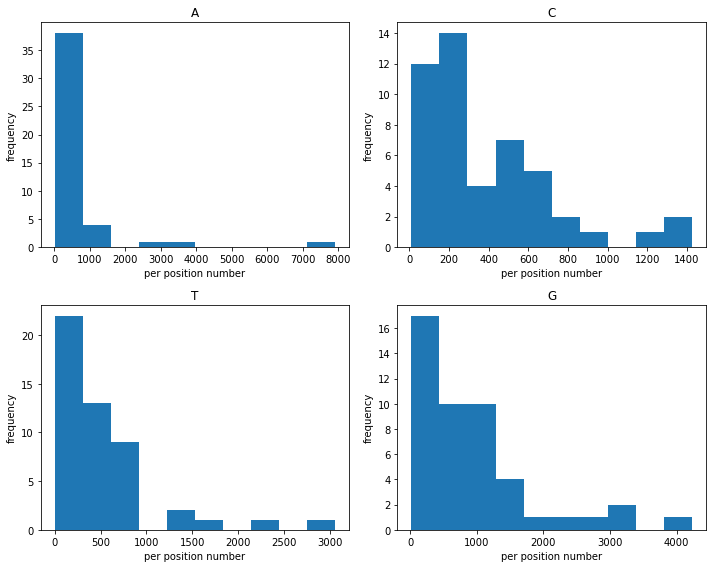

In [30]:
nucleotides = ["A", "C", "T", "G"]
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))
for i in range(2):
    for j in range(2):
        axes[i,j].hist(train[nucleotides[2*i + j]])
        axes[i,j].set_title(nucleotides[2*i + j])
        axes[i,j].set_xlabel("per position number")
        axes[i,j].set_ylabel("frequency")
fig.tight_layout()
plt.show()

### Subsetting train and writing to csv

In [38]:
train_part = train[train["matches"] > np.mean(train["matches"])]

In [39]:
train_part = train_part[["pos", "reads_all", "mismatches", "deletions", "insertions"]]

In [40]:
train_part.head()

,pos,reads_all,mismatches,deletions,insertions
1,280,8045,48,19,9
2,281,8045,50,16,5
3,282,8049,505,33,65
4,283,8042,155,115,62
5,284,8048,104,864,241


In [41]:
train_part.to_csv("train_part.csv")

### EDA of sklearn diabetes dataset

In [42]:
from sklearn.datasets import load_diabetes

In [52]:
diabet = load_diabetes()

In [53]:
diabet = pd.DataFrame(data=diabet.data, columns=diabet.feature_names)


In [116]:
diabet.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [55]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


#### Look at variables distribution

In [57]:
variables = diabet.columns

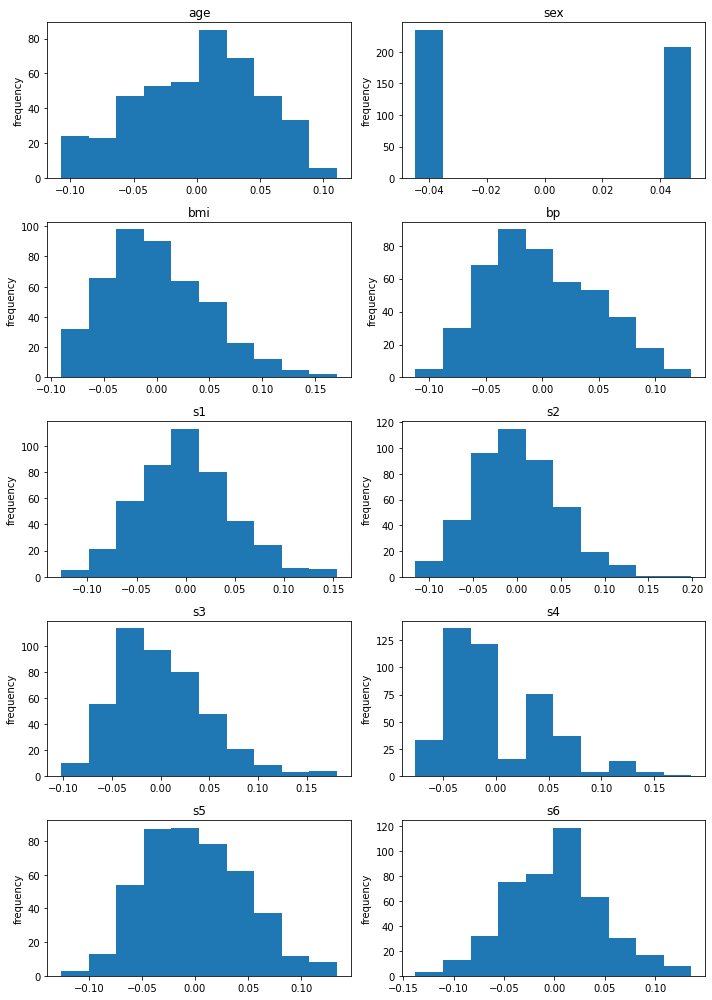

In [63]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (10,14))
for i in range(len(variables)//2):
    for j in range(2):
        axes[i,j].hist(diabet[variables[2*i + j]])
        axes[i,j].set_title(variables[2*i + j])
        axes[i,j].set_ylabel("frequency")
fig.tight_layout()
plt.show()

#### Plotting correlations

In [70]:
corr_matr = diabet.corr()

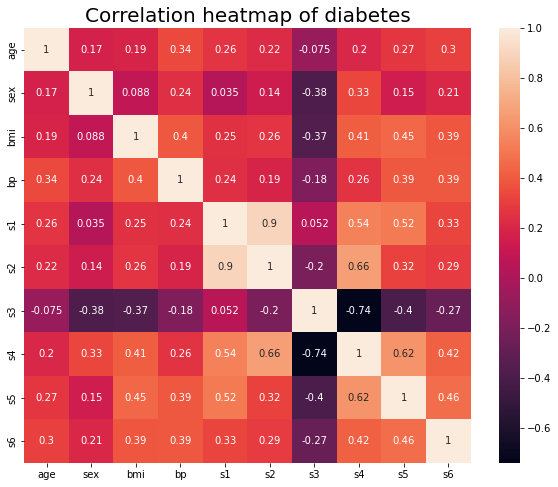

In [79]:
plt.figure(figsize = (10,8))
sns.heatmap(corr_matr, xticklabels=corr_matr.columns, yticklabels=corr_matr.columns, annot=True)
plt.title("Correlation heatmap of diabetes", fontsize = 20)
plt.show()

#### Reveal sex differencies 

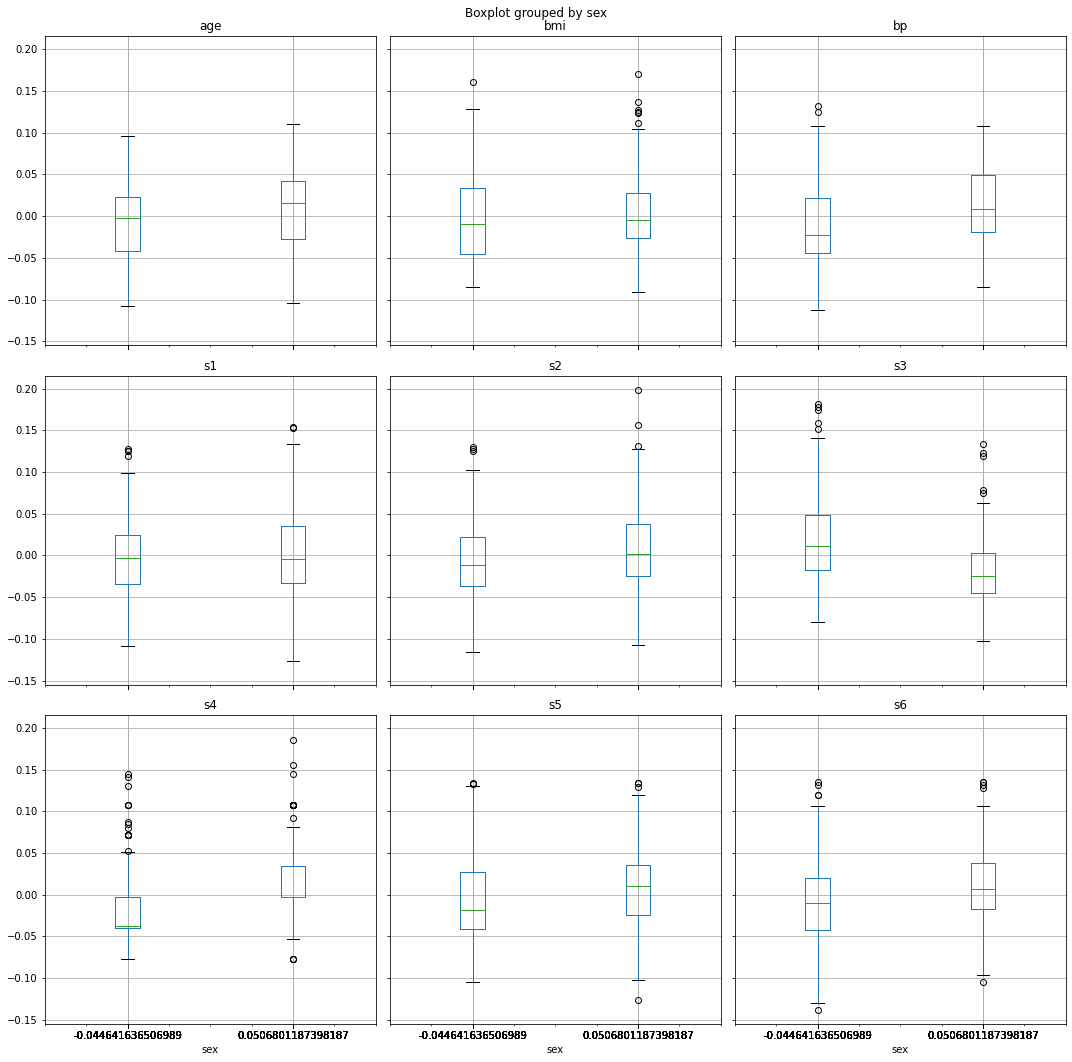

In [106]:
diabet.boxplot(column=['age','bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] ,by='sex', figsize = (15,15))
plt.tight_layout()
plt.show()

It seems that there can be outliers in s4, but i have no idea how to check as frame is standartized

## Work with real data

In [1]:
import re
import os

In [2]:
def read_gff(path):
    
    pattern = re.compile("5S|16S|23S")
    with open(path) as rna, open(".corrected_annotation.gff", mode = "w") as result:
        rna.readline()
        for line in rna:
            line = line.split("\t")
            global_addition = line[8]
            match = pattern.search(global_addition)
            target_addition = global_addition[match.start() : match.end()]
            line[8] = target_addition
            line = "\t".join(line)
            result.write(line + "\n")
    frame = pd.read_table(".corrected_annotation.gff", sep = "\t", header = None, names = ["seqname", "source", \
                                                                                      "feature", "start", "end", \
                                                                                      "score", "strand", "frame", \
                                                                                        "RNA_type"])
    os.remove('.corrected_annotation.gff')
    return frame
        
        

In [6]:
gff_frame = read_gff("rrna_annotation.gff")

In [47]:
gff_frame

,seqname,source,feature,start,end,score,strand,frame,RNA_type
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


In [8]:
def  read_bed6(path):
    frame = pd.read_table(path, sep = "\t", header = None, names = ["chromosome", "start", "end", "name", "score", \
                                                                    "strand"])
    return frame

In [24]:
bed = read_bed6("alignment.bed")

In [10]:
bed

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


### Counting number of different RNA types

In [11]:
rna_counts = gff_frame.groupby("RNA_type").apply(len)

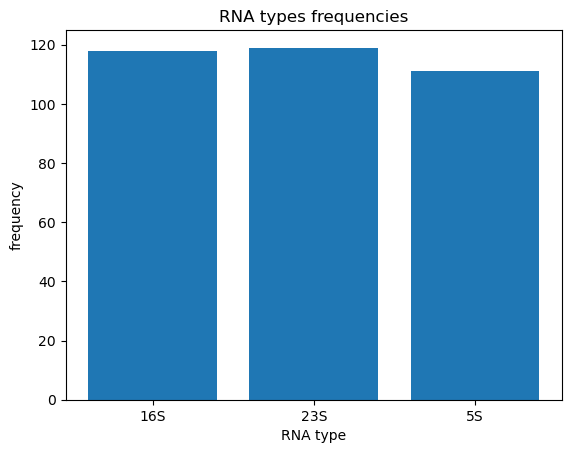

In [12]:
plt.bar(rna_counts.index, rna_counts)
plt.title("RNA types frequencies")
plt.xlabel("RNA type")
plt.ylabel("frequency")
plt.show()

## Bedtools intersect in pandas

In [57]:
merged = gff_frame.merge(bed, left_on='seqname', right_on='chromosome')
merged

,seqname,source,feature,start_x,end_x,score_x,strand_x,frame,RNA_type,chromosome,start_y,end_y,name,score_y,strand_y
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,Reference_10,67964,68037,NODE_19846_length_73_cov_334.777778,0,+
1,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,Reference_10,512498,512739,NODE_13330_length_244_cov_1.195767,4,-
2,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,Reference_10,1940123,1940316,NODE_15898_length_227_cov_0.959302,0,-
3,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,Reference_10,2959910,2960140,NODE_14270_length_237_cov_1.565934,60,+
4,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,Reference_10,3422064,3422561,NODE_4494_length_558_cov_1.447316,60,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126743,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,Reference_25,3749069,3749300,NODE_15186_length_231_cov_783.727273,0,-
126744,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,Reference_25,3749245,3749677,NODE_5718_length_432_cov_495.000000,31,-
126745,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,Reference_25,3749622,3759983,NODE_952_length_10361_cov_185.048709,60,+
126746,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,Reference_25,3759928,3761392,NODE_2106_length_1464_cov_409.744500,0,-


In [58]:
merged[(merged["start_x"] > merged["start_y"]) & (merged["end_x"] < merged["end_y"])]

,seqname,source,feature,start_x,end_x,score_x,strand_x,frame,RNA_type,chromosome,start_y,end_y,name,score_y,strand_y
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,Reference_11,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,Reference_11,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,Reference_11,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,Reference_11,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,Reference_11,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121855,Reference_14,barrnap:0.9,rRNA,2433040,2433152,2.000000e-12,-,.,5S,Reference_14,2433027,2433434,NODE_6108_length_407_cov_1153.232955,0,+
122182,Reference_14,barrnap:0.9,rRNA,3766952,3767064,2.000000e-12,-,.,5S,Reference_14,3766939,3767346,NODE_6108_length_407_cov_1153.232955,0,+
122583,Reference_25,barrnap:0.9,rRNA,1329370,1329473,2.900000e-10,-,.,5S,Reference_25,1329345,1329810,NODE_5333_length_465_cov_547.609756,0,-
125060,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S,Reference_25,1822575,1823040,NODE_5333_length_465_cov_547.609756,0,+
